# Examples: Multiple linear regression: Fitting a model in sklearn

In this notebook, we delve into the intricacies of multiple linear regression, building upon the foundational understanding of simple linear regression. We explore how to fit a model using sklearn, taking into account multiple predictor variables to predict a response variable. Additionally, we introduce the mtcars dataset, a classic dataset in statistics, to illustrate the concepts in a practical context. 

## Learning Objectives

By the end of this video, you should be able to:

* Understand the principles of multiple linear regression and its extension from simple linear regression.
* Load and preprocess data for multiple linear regression analysis.
* Fit a multiple linear regression model using sklearn.
* Interpret the coefficients of the fitted model to understand their influence on the response variable.
* Evaluate model accuracy using mean squared error (MSE) and root mean squared error (RMSE).


## Introduction

Recall that the simple linear regression equation is as follows:

$$Y = \beta_{0} + \beta_{1}X_1$$

where:
- $\beta_{0}$ is the intercept, interpreted as the value of $Y$ when $X_1 = 0$;
- $\beta_{1}$ is the coefficient, interpreted as the effect on $Y$ for a one unit increase in $X_1$; and
- $X_1$ is the single predictor variable.

Extending that idea to multiple linear regression is as simple as adding an **$X_{j}$** and corresponding **$\beta_{j}$** for each of the **$p$** predictor variables, where **$j$** is an element of the set **$[1,p]$**.
   
Hence in multiple linear regression, our regression equation becomes:   

**$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p$$**

where:

- **$Y$** is the reponse variable which depends on the **$p$ predictor variables**;
- **$\beta_0$** is the intercept, interpreted as the value of **$Y$** when _all_ predictor variables are equal to zero;
- **$\beta_j$** is the average effect on **$Y$** of a one unit increase in **$X_j$**, assuming all other predictors are held fixed.

## The dataset: `mtcars` 

As usual, we need to import a few Python libraries.

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

Next we will load our data as a pandas DataFrame. For this train, we'll be using the famous `mtcars` dataset, an extract from the 1974 US Motor Trend magazine, which comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles.

In [2]:
#read the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/regression_sprint/mtcars.csv', index_col=0)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
#Explore the shape of the dataset
df.shape

(32, 11)

As we can see, the DataFrame contains multiple columns - 11 in total. 

Simple linear regression models make use of a single predictor variable when fitting a model. While that seems easy to understand, the world is seldom as simple as that. Real problems contain multiple variables and we need to take into account as many as necessary.

## Modelling miles per gallon

Let's attempt to model the miles per gallon (_mpg_) rating of a car using its other characteristics. `mpg` is an intuitive response variable and we would expect it to be negatively impacted by things like a heavier car (_wt_), higher horsepower (_hp_),and bigger engine displacement (_disp_), among other things.

To start with, we'll carry out this multiple linear regression in `sklearn`.

To get a better idea of what a multi-dimensional dataset looks like, we'll generate a 3D scatter plot showing the `mpg` on the _z_-axis, with two predictor variables, `cyl` and `disp` on the _x_- and _y_-axes.

<IPython.core.display.Javascript object>


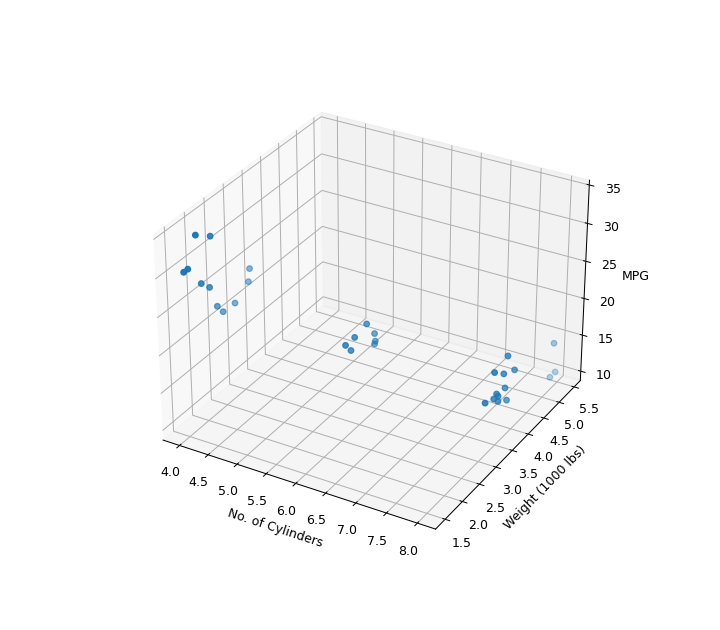

In [4]:
# create figure and 3d axes
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection='3d')

# set axis labels
ax.set_zlabel('MPG')
ax.set_xlabel('No. of Cylinders')
ax.set_ylabel('Weight (1000 lbs)')

# scatter plot with response variable and 2 predictors
ax.scatter(df['cyl'], df['wt'], df['mpg'])

The above scatter plot will not display correctly in VSCode, therefore you are advised to run the cell in Jupyter.

We know that in simple two dimensional linear regression, any model that we fit to the data manifests in the form of a straight line. Extending this idea to 3D, the line becomes a plane - a flat surface which is chosen to minimise the squared vertical distances between each observation (red dots), and the plane, as shown in the figure below.

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://github.com/Explore-AI/Public-Data/raw/master/3D%20regression%20ISLR.jpg"  style="width:70%";/>
<br>
<br>
    <em>Figure 1: 3D plane</em>
</div>

The result of a multivariate linear regression in higher dimensionality is known as a **_hyperplane_** - similar to the flat surface in the figure above, but in a **_p_-dimensional space**, where $p>3$. Unfortunately, humans lack the ability to visualise any number of dimensions greater than three - so we have to be content with the idea that a hyperplane in a _p_-dimensional space is effectively like a flat surface in a 3-dimensional space.

## Fitting a multivariate regression model

In `sklearn`, fitting a multiple linear regression model is similar to fitting a simple linear regression. This time, of course, our $X$ contains multiple columns, where it only contained one before. 

In [5]:
# import regression module
from sklearn.linear_model import LinearRegression

# split predictors and response
X = df.drop(['mpg'], axis=1)
y = df['mpg']

In [6]:
# create model object
lm = LinearRegression()

In [7]:
# import train/test split module
from sklearn.model_selection import train_test_split

In [8]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

In [9]:
# train model
lm.fit(X_train, y_train)

LinearRegression()

Having fit our model to the provided training data, we can now inspect its coefficients to get a better understanding of their influence on the predictions the model will provide.

In [10]:
# extract model intercept
beta_0 = float(lm.intercept_)

In [11]:
# extract model coefficients
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [12]:
print("Intercept:", beta_0)

Intercept: 8.465282572242597


In [13]:
beta_js

,Coefficient
cyl,0.190203
disp,0.008613
hp,-0.022868
drat,1.477014
wt,-3.564785
qsec,0.924358
vs,-1.248904
am,1.340890
gear,0.482458
carb,-0.187354


The results show the coefficients of the features in the model. These coefficients indicate the change in the response variable for a one-unit change in the corresponding feature, holding all other features constant. Positive coefficients indicate a positive relationship with the response variable, while negative coefficients indicate a negative relationship.

Let's see what our model looks like in a few 2-dimensional plots by plotting `wt`, `disp`, `cyl`, and `hp` vs. `mpg`, respectively (top-left to bottom-right).

<IPython.core.display.Javascript object>


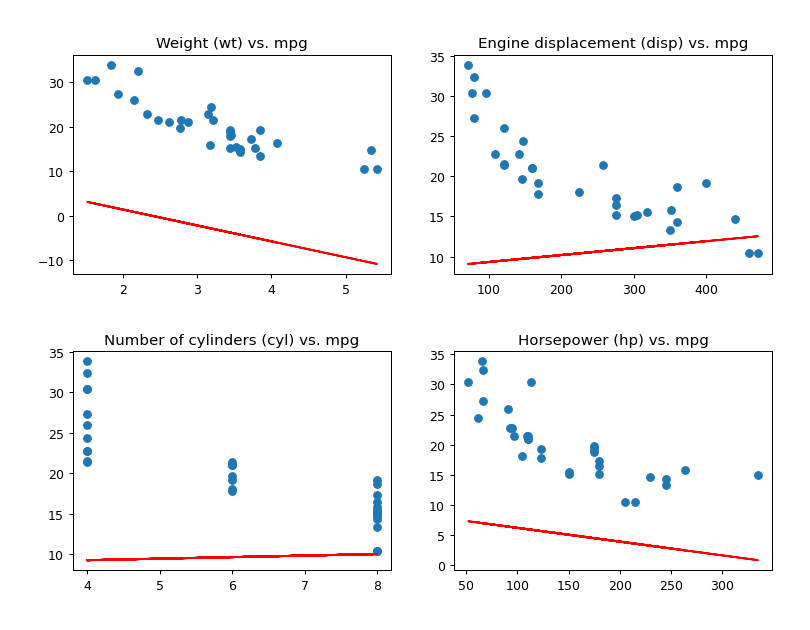

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(9,7))

axs[0,0].scatter(df['wt'], df['mpg']) # Creates a scatter plot for the two vars
axs[0,0].plot(df['wt'], lm.intercept_ + lm.coef_[4]*df['wt'], color='red') # Plots the equation b0 + b1x1 for each var
axs[0,0].title.set_text('Weight (wt) vs. mpg')

axs[0,1].scatter(df['disp'], df['mpg'])
axs[0,1].plot(df['disp'], lm.intercept_ + lm.coef_[1]*df['disp'], color='red')
axs[0,1].title.set_text('Engine displacement (disp) vs. mpg')

axs[1,0].scatter(df['cyl'], df['mpg'])
axs[1,0].plot(df['cyl'], lm.intercept_ + lm.coef_[0]*df['cyl'], color='red')
axs[1,0].title.set_text('Number of cylinders (cyl) vs. mpg')

axs[1,1].scatter(df['hp'], df['mpg'])
axs[1,1].plot(df['hp'], lm.intercept_ + lm.coef_[2]*df['hp'], color='red')
axs[1,1].title.set_text('Horsepower (hp) vs. mpg')

fig.tight_layout(pad=3.0)

plt.show()

It looks as if some of the predictors have been somewhat correctly modelled by the regression. Others, like `disp` in the top-right, are nowhere near.

## Assessing model accuracy

Let's assess the fit of our multivariate model. For a rudimentary comparison, let's measure model accuracy against a simple linear regression model that uses only `disp` as a predictor variable for `mpg`.

In [15]:
# comparison linear model
slr = LinearRegression()

slr.fit(X_train[['disp']], y_train)

LinearRegression()

In [16]:
from sklearn import metrics
import math

Let's calculate the training Mean Squared Error (MSE), test MSE, and test Root Mean Squared Error (RMSE) for both our Simple Linear Regression (SLR) and Multiple Linear Regression (MLR) models.

In [17]:
# dictionary of results
results_dict = {'Training MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_train, slr.predict(X_train[['disp']])),
                        "MLR": metrics.mean_squared_error(y_train, lm.predict(X_train))
                    },
                'Test MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_test, slr.predict(X_test[['disp']])),
                        "MLR": metrics.mean_squared_error(y_test, lm.predict(X_test))
                    },
                'Test RMSE':
                    {
                        "SLR": math.sqrt(metrics.mean_squared_error(y_test, slr.predict(X_test[['disp']]))),
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test, lm.predict(X_test)))
                    }
                }

We have included a column, *test RMSE*, which is simply the square root of the *test MSE*.


\begin{align}
RMSE & = \sqrt{MSE} \\
     & = \sqrt{\frac{1}{N}\sum^{N} (\hat{y_i} - y_i)^{2}}
\end{align}

Where $y_i$ are the actual target values for a dataset with $N$ datapoints, and $\hat{y_i}$ represent our corresponding predictions. RMSE is a more intuitive metric to use than MSE because it is in the same units as the underlying variable being predicted.

For instance, MSE would be measured in units of $mpg^2$, whereas RMSE is measured in the same units as $mpg$.

In [18]:
# create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)

In [19]:
results_df

,Training MSE,Test MSE,Test RMSE
SLR,8.201521,20.500165,4.527711
MLR,3.737534,11.520901,3.394245


 Clearly the multiple linear regression performed a lot better than using just `disp` to try and predict `mpg`, underpinning that the relationship between the dependent variable (mpg) and the independent variables is **not adequately captured by a single predictor**. 
 
 By incorporating multiple predictors simultaneously, the multiple linear regression model can **account for the combined influence of these factors** on the dependent variable, resulting in **improved predictive performance** and a **more accurate representation** of the underlying relationship in the data.